In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [91]:
#Импортируем спаршенные данные
df = pd.read_excel(r"aktsii.xlsx")
df

,TICKER,ЦЕНА,КОЛИЧЕСТВО АКЦИЙ,ПРИБЫЛЬ,ВЫРУЧКА,FCF,Собственный капитал (EQUITY),АКТИВЫ 2021,АКТИВЫ 2022,ROA,ROS,Балансовая стоиомтсь,Размер,Чистые активы,CEO's gender,CEO's age,CEO's nationality,CEO's education
0,CIAN,595.20,69042400,480000000,8266000000,1802000000,5009000000,5600000000,6974000000,0.076348,0.058069,5009000000,0.199181,5009000000,1,63,1,10
1,ETLN,79.98,383441416,13001000000,80556000000,-52016000000,74189000000,222098000000,248045000000,0.055307,0.161391,74189000000,0.078900,74189000000,0,63,1,6
2,FIXP,295.50,850000000,21411000000,277644000000,24767000000,29267000000,84929000000,113026000000,0.216322,0.077117,29267000000,0.073923,29267000000,0,50,1,4
3,GLTR,615.40,178740916,24919886000,94474032000,28752204000,67462195000,108284996000,110154102000,0.228163,0.263775,67462195000,0.154419,67462195000,1,75,1,6
4,HHRU,2973.00,50635720,3691494000,18085164000,7219260000,6863685000,22782272000,23900880000,0.158151,0.204117,6863685000,0.073514,6863685000,1,53,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,KCHE,0.58,48746657782,1271000000,15038000000,-2328000000,9393000000,31603000000,33858000000,0.038832,0.084519,9393000000,0.071745,9393000000,0,62,1,10
93,MAGE,4.45,145673254,-2561000000,11923000000,-2966000000,3484000000,14070000000,18478000000,-0.157368,-0.214795,3484000000,0.053521,3484000000,1,53,1,6
94,SAGO,3.15,3538928532,1122014000,40754572000,1227829000,6380626000,9205918000,10285896000,0.115127,0.027531,6380626000,0.163675,6380626000,1,78,1,8
95,SLEN,4.96,1237175444,-6295000000,12475000000,-3245000000,11461000000,38654000000,28941000000,-0.186256,-0.504609,11461000000,0.084777,11461000000,0,53,1,6


In [92]:
#Сгладим значения финансовых показателей, пролагорифмировав их

df["ПРИБЫЛЬ_log"] = np.log(df["ПРИБЫЛЬ"])
df["ВЫРУЧКА_log"] = np.log(df["ВЫРУЧКА"])
df["FCF_log"] = np.log(df["FCF"])


c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


В работе нам необходимо проверить, оказывает ли влияние на выручку, прибыль и FCF компании пол, возраст и уровень образования генерального директора. Прежде, чем строить модель, попробуем оценить с помощью гистограмм, как распределяются финансовые показатели фирмы в зависимости от характеристик CEO

###Анализ влияния пола директора на финансовые показатели

In [93]:
#Посмотрим на средние и медианные значения финансовых показателей по рынку. Как видим, среднее у мужчин выше, чем у женщин,
#В отношении всех исследуемых характеристик - выручки, прибыли и FCF

df_for_analyze = df[["CEO's gender", "ROA", "ROS"]].replace([0,1], ["Female", "Male"])
df_for_analyze_mean = df_for_analyze.groupby(["CEO's gender"]).mean()
df_for_analyze_mean.round(2)
df_for_analyze_mean["ТИП"] = "Mean"

df_for_analyze_median = df_for_analyze.groupby(["CEO's gender"]).median()
df_for_analyze_median.round(2)
df_for_analyze_median["ТИП"] = "Median"

pd.concat([df_for_analyze_mean, df_for_analyze_median])

,ROA,ROS,ТИП
CEO's gender,,,
Female,0.067437,-0.025715,Mean
Male,0.086449,0.083025,Mean
Female,0.038832,0.048010,Median
Male,0.064286,0.087724,Median


<Axes: xlabel='ROS', ylabel='Count'>

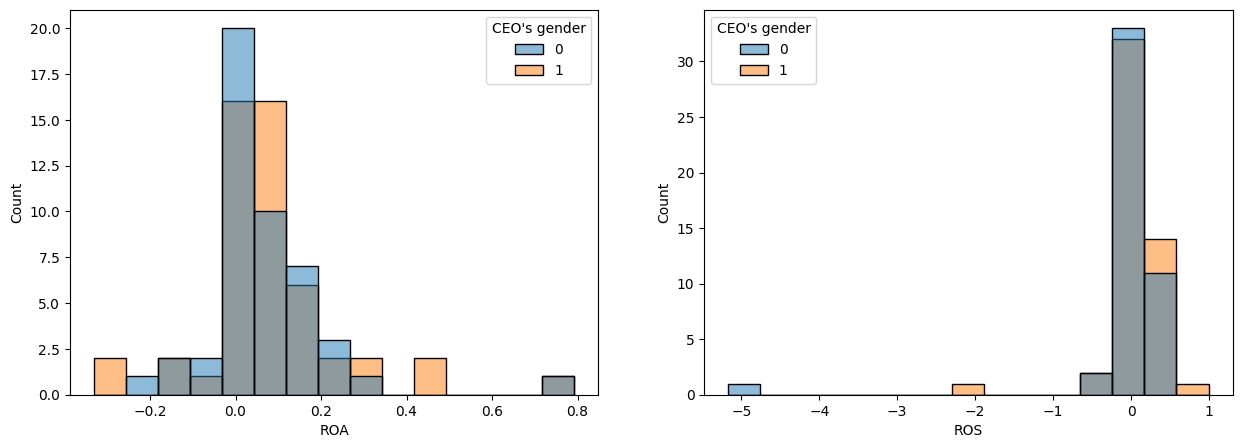

In [94]:
#Зависимость финансовых показателей от пола директора (0 - мужской пол, 1 - женский). Как мы видим, компании, где директор
#мужского пола, показывают финансовые результаты выше медианных значений по рынку. Можно считать, что эту переменную есть смысл 
#Включить в модель

f, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df, x = "ROA", bins=15, hue= """CEO's gender""", ax=axes[0])
sns.histplot(df, x = "ROS", bins=15, hue= """CEO's gender""",  ax=axes[1])

<Axes: >

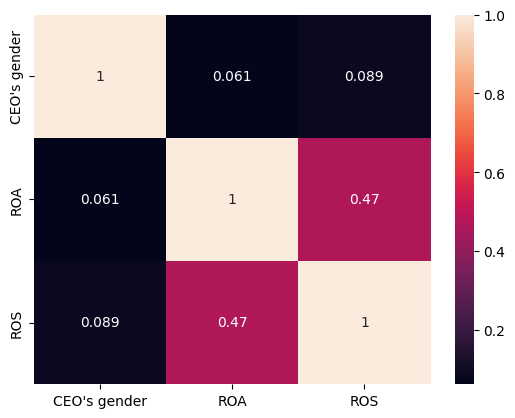

In [95]:
corr = df[["CEO's gender", "ROA", "ROS"]]
sns.heatmap(corr.corr(), annot=True)

###Анализ влияния национальности директора на финансовые показатели

<Axes: xlabel='ROS', ylabel='Count'>

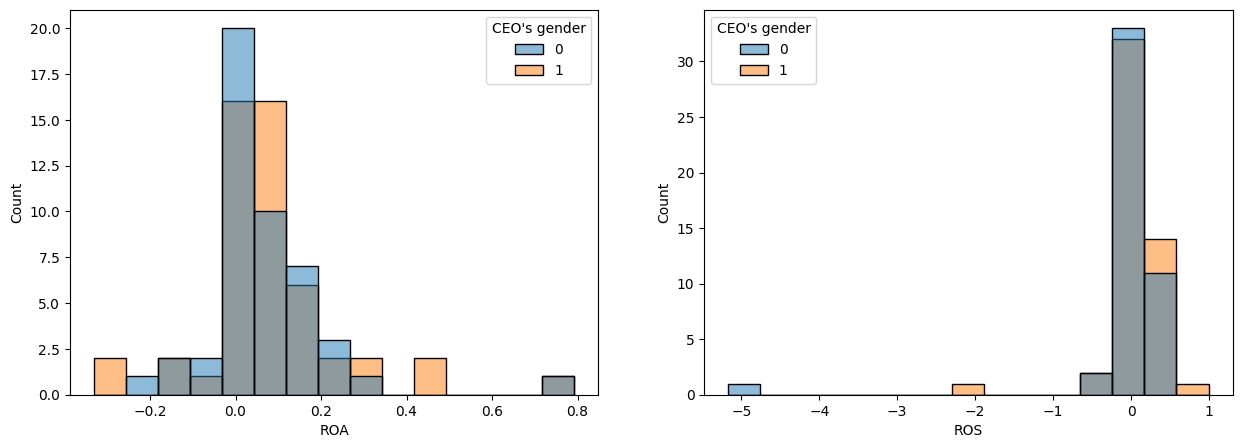

In [96]:
#Зависимость финансовых показателей от пола директора (0 - мужской пол, 1 - женский). Как мы видим, компании, где директор
#мужского пола, показывают финансовые результаты выше медианных значений по рынку. Можно считать, что эту переменную есть смысл 
#Включить в модель

f, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df, x = "ROA", bins=15, hue= """CEO's gender""", ax=axes[0])
sns.histplot(df, x = "ROS", bins=15, hue= """CEO's gender""",  ax=axes[1])

<Axes: xlabel='ROS', ylabel='Count'>

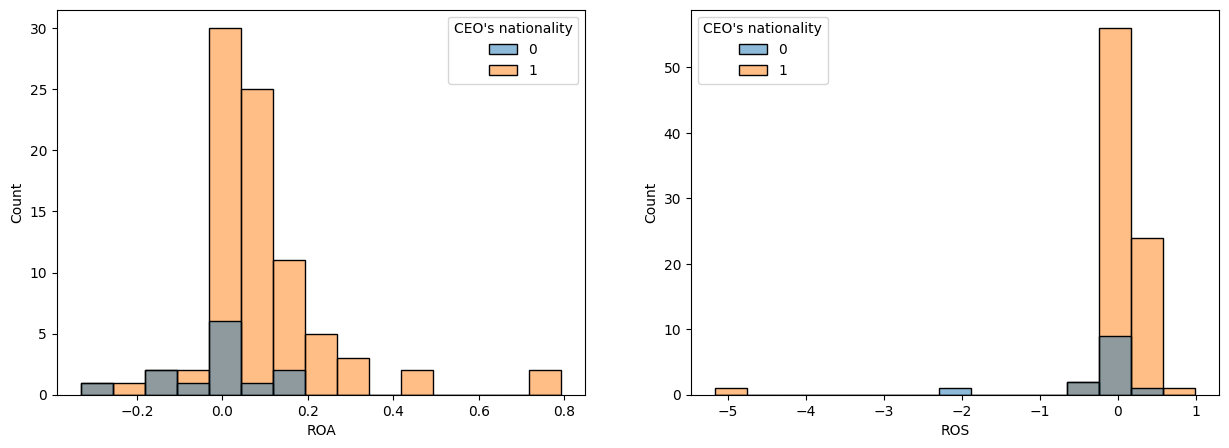

In [97]:
#Зависимость финансовых показателей от пола директора (0 - мужской пол, 1 - женский). Как мы видим, компании, где директор
#мужского пола, показывают финансовые результаты выше медианных значений по рынку. Можно считать, что эту переменную есть смысл 
#Включить в модель

f, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df, x = "ROA", bins=15, hue= """CEO's nationality""", ax=axes[0])
sns.histplot(df, x = "ROS", bins=15, hue= """CEO's nationality""",  ax=axes[1])

<Axes: >

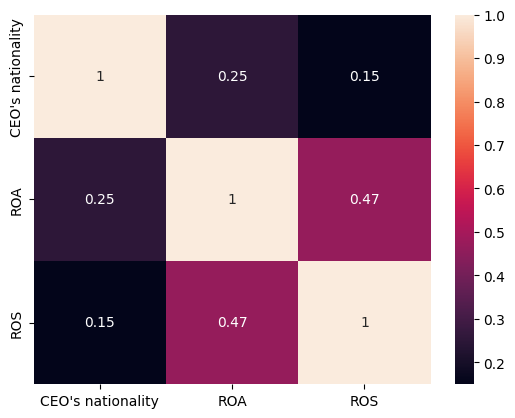

In [98]:
corr = df[["CEO's nationality", "ROA", "ROS"]]
sns.heatmap(corr.corr(), annot=True)

###Проверка влияния возраста и образования директора на финансовые показатели

In [99]:
corrAge = df[["CEO's age", "ROA", "ROS"]]

corrEdu = df[["CEO's education", "ROA", "ROS"]]

<Axes: >

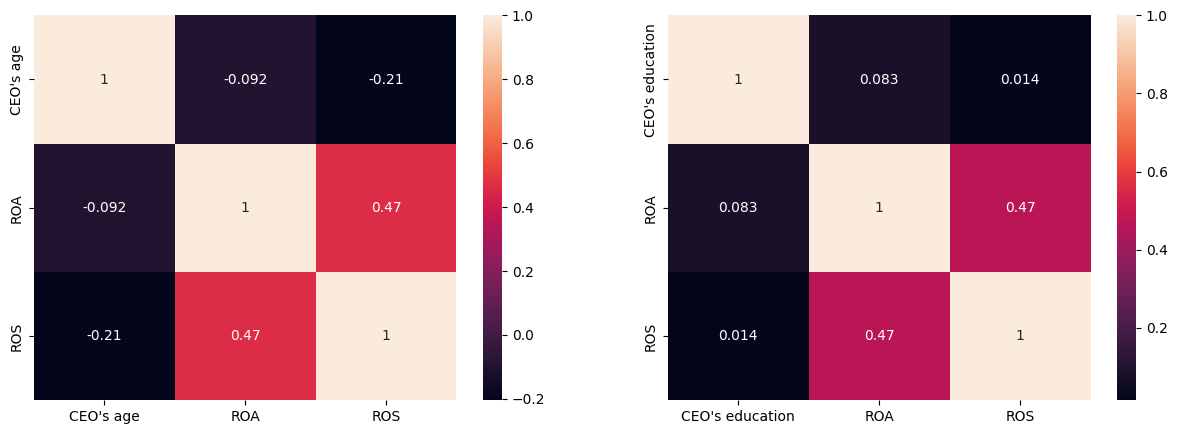

In [110]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.heatmap(corrAge.corr(), annot=True, ax=axes[0])
sns.heatmap(corrEdu.corr(), annot=True, ax=axes[1])